<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla</em><br>
</div>

# Tarea 2: Machine Learning

**Fecha de Entrega**: 28 de septiembre de 2024

**Objetivos:**
  - En este laboratorio deberá utilizar los algoritmos KMeans, Clustering Jerárquico y Gaussian Mixtures. Deberá subir una
foto escogida por su grupo en formato .npg y: 
  - Obtener su escala de colores (mínimo 3 colores y máximo el ideal comparativo encontrado por scree-plot).
  - Recomponer la imagen exclusivamente con esa escala reducida

**Nombres de los estudiantes**: 
<ul>
  <li>Scarlett Conejeros Rojas</li>
  <li>Andrés Perez Carvajal</li>
  <li>Javiera Santana Abasolo</li>
  <li>Ingrid Solís González</li>
</ul>
    

Ingrese la ruta de la imagen .png:  ./gato.jpeg


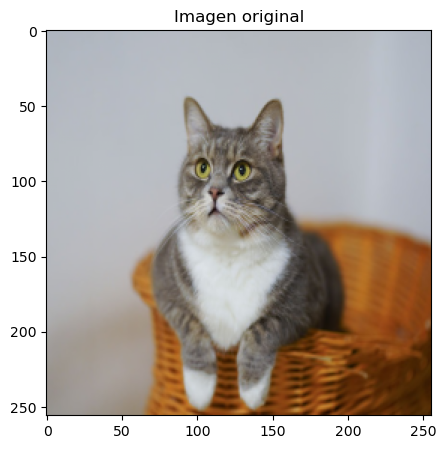

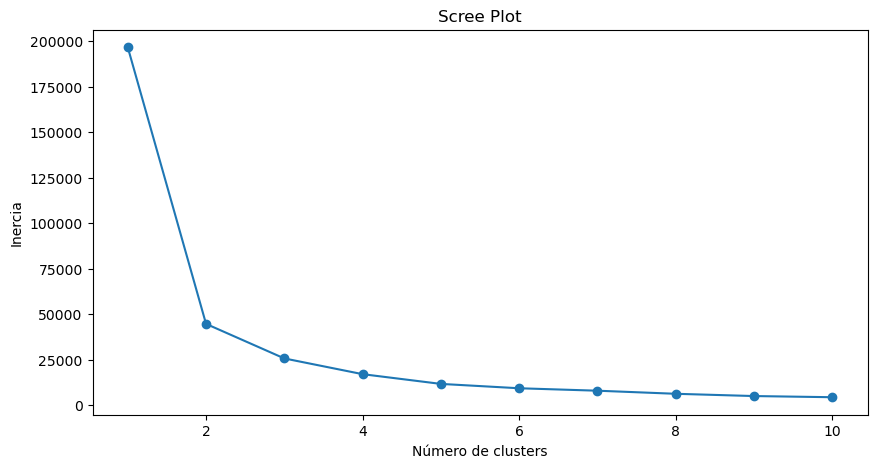

Ingrese el número óptimo de clusters basado en el scree plot:  5


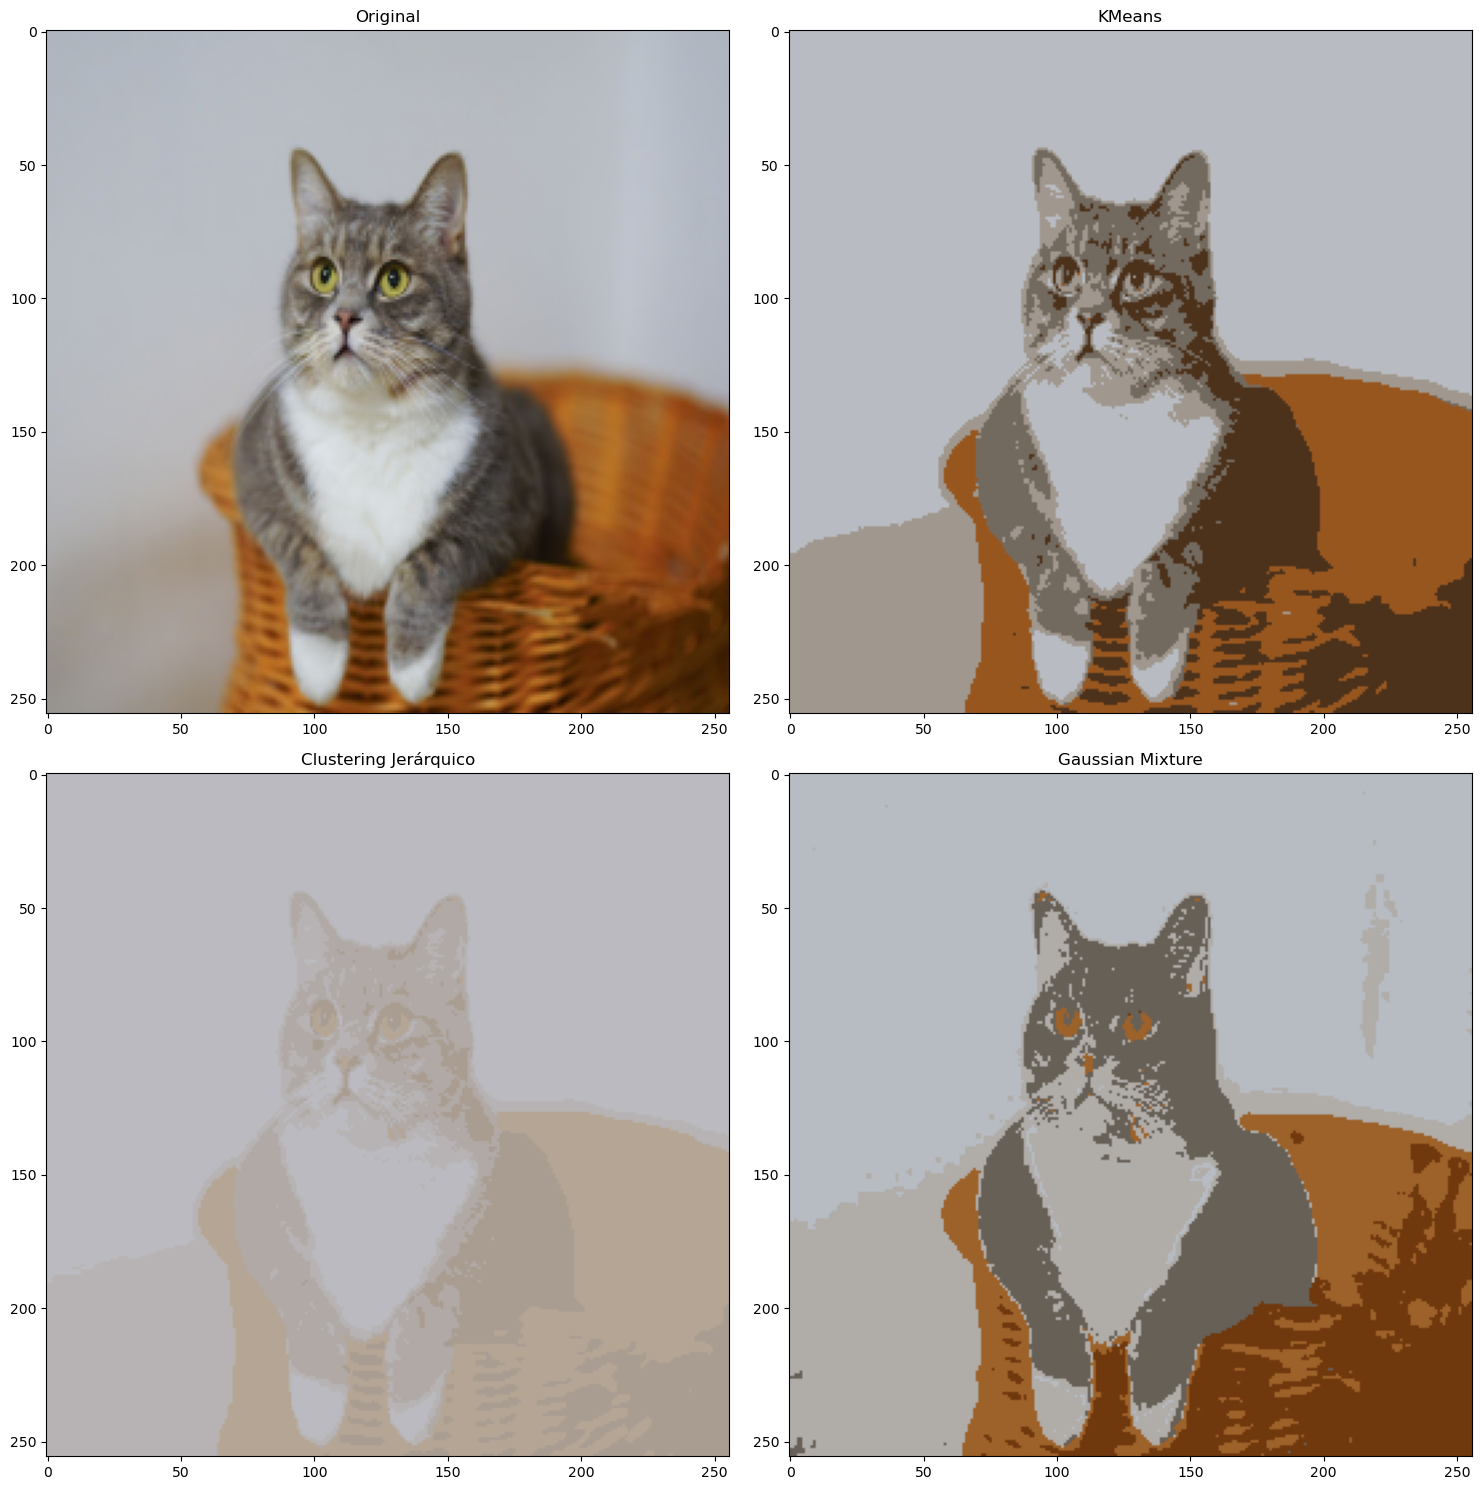

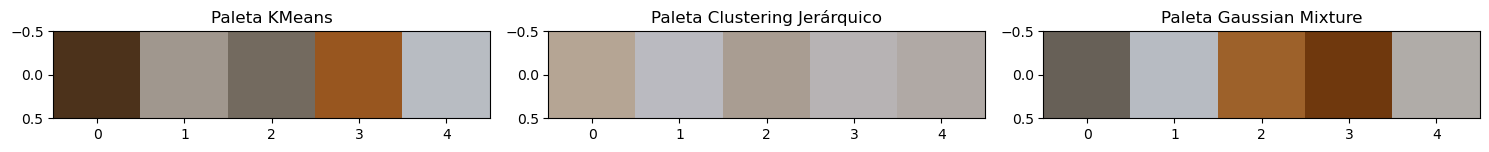

In [2]:
# Importar bibliotecas a utilizar
# codigo correcto
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from skimage import io
from skimage.transform import resize
from skimage.color import gray2rgb, rgba2rgb

# Cargar y preprocesar la imagen
def cargar_imagen(ruta):
    imagen = io.imread(ruta)
    
    # Convertir a RGB si es necesario
    if len(imagen.shape) == 2:  # Imagen en escala de grises
        imagen = gray2rgb(imagen)
    elif imagen.shape[2] == 4:  # Imagen RGBA
        imagen = rgba2rgb(imagen)
    
    return resize(imagen, (256, 256))

# Convertir imagen a array 2D de píxeles
def imagen_a_2d(imagen):
    return imagen.reshape(-1, imagen.shape[-1])

# Determinar número óptimo de clusters con scree plot
def scree_plot(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.title('Scree Plot')
    plt.show()

# Realizar clustering con KMeans
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    return kmeans.cluster_centers_, labels

# Realizar clustering jerárquico
def clustering_jerarquico(data, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(data)
    return labels

# Realizar clustering con mezclas gaussianas
def gaussian_mixture(data, n_components):
    gm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gm.fit_predict(data)
    return gm.means_, labels

# Recomponer la imagen con la paleta reducida
def recomponer_imagen(imagen_original, labels, paleta):
    imagen_plana = imagen_a_2d(imagen_original)
    nueva_imagen = np.zeros_like(imagen_plana)
    for i, label in enumerate(labels):
        nueva_imagen[i] = paleta[label]
    return nueva_imagen.reshape(imagen_original.shape)

# Función principal
def main(ruta_imagen):
    # Cargar imagen
    imagen = cargar_imagen(ruta_imagen)
    plt.figure(figsize=(5, 5))
    plt.imshow(imagen)
    plt.title("Imagen original")
    plt.show()

    # Preprocesar datos
    datos = imagen_a_2d(imagen)

    # Ajustar el StandardScaler
    scaler = StandardScaler()  # Instancia que ajusta los datos
    datos_normalizados = scaler.fit_transform(datos)

    # Scree plot para determinar número óptimo de clusters
    scree_plot(datos_normalizados)
    n_clusters = int(input("Ingrese el número óptimo de clusters basado en el scree plot: "))

    # KMeans
    paleta_kmeans, labels_kmeans = kmeans_clustering(datos_normalizados, n_clusters)
    # Desescalar los centroides a su valor original utilizando el scaler ya ajustado
    paleta_kmeans_original = scaler.inverse_transform(paleta_kmeans)  # Cambiado
    imagen_kmeans = recomponer_imagen(imagen, labels_kmeans, paleta_kmeans_original)

    # Clustering Jerárquico
    labels_jerarquico = clustering_jerarquico(datos_normalizados, n_clusters)
    paleta_jerarquico = np.array([datos[labels_jerarquico == i].mean(axis=0) for i in range(n_clusters)])
    
    # Desescalar la paleta del clustering jerárquico usando el mismo scaler
    paleta_jerarquico_original = scaler.inverse_transform(paleta_jerarquico)  # Cambiado
    imagen_jerarquico = recomponer_imagen(imagen, labels_jerarquico, paleta_jerarquico_original)

    # Gaussian Mixture
    paleta_gm, labels_gm = gaussian_mixture(datos_normalizados, n_clusters)
    
    # Desescalar la paleta de Gaussian Mixture usando el mismo scaler
    paleta_gm_original = scaler.inverse_transform(paleta_gm)  # Cambiado
    imagen_gm = recomponer_imagen(imagen, labels_gm, paleta_gm_original)

    # Visualizar resultados
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    axs[0, 0].imshow(imagen)
    axs[0, 0].set_title("Original")
    axs[0, 1].imshow(imagen_kmeans)
    axs[0, 1].set_title("KMeans")
    axs[1, 0].imshow(imagen_jerarquico)
    axs[1, 0].set_title("Clustering Jerárquico")
    axs[1, 1].imshow(imagen_gm)
    axs[1, 1].set_title("Gaussian Mixture")
    plt.tight_layout()
    plt.show()

    # Mostrar paletas de colores
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow([paleta_kmeans_original])  # Cambiado
    axs[0].set_title("Paleta KMeans")
    axs[1].imshow([paleta_jerarquico_original])  # Cambiado
    axs[1].set_title("Paleta Clustering Jerárquico")
    axs[2].imshow([paleta_gm_original])  # Cambiado
    axs[2].set_title("Paleta Gaussian Mixture")
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    ruta_imagen = input("Ingrese la ruta de la imagen .png: ")
    main(ruta_imagen)

**Conclusiones:**
La tarea permitió reducir la paleta de colores de la imagen, esto en base a un análisis para determinar un número óptimo de colores mediante el scree-plot. De esta forma, se mnatiene, se ve qué algoritmos utilizar para simplificar imágenes sin perder significativamente su calidad. Ahora, si bien al recomponer la imagen utilizando la paleta reducida obtenida por KMeans, se mantienen los detalles principales de la imagen, se observa que la reducción de colores mostró diferencias en áreas con tonos similares, evidenciando la limitación de la segmentación.

    
Al hacer la comparación de métodos de clustering, el análisis jerárquico proporcionó una visión alternativa de la segmentación de la imagen. que si bien fue más útil para identificar relaciones jerárquicas ,fue menos práctico al reducir la paleta de colores.

    
El modelo de Gaussian Mixtures ofreció una segmentación más suave en comparación con KMeans, entregando una restauración de la imagen más natural y con transiciones de color menos abruptas.


La paleta de colores resultante de cada método refleja diferentes enfoques para reducir la cantidad de colores presentes en la imagen. Mientras que KMeans tiende a agrupar colores dominantes de manera abrupta, el Clustering Jerárquico y GMM tienden a ser más precisos con la segmentación espacial o la distribución estadística del color. Dependiendo del objetivo (simplificación, suavidad, o precisión en los detalles), cada método puede ser útil para diferentes aplicaciones de análisis de imágenes.


